In [2]:
import re
import numpy as np

from glove import Corpus, Glove
from nltk.corpus import gutenberg
from multiprocessing import Pool
from scipy import spatial

In [19]:
sentences = list()
with open('data/seq.txt') as f:
    for line in f:
        sentences.append(line.split())

In [22]:
corpus = Corpus()

In [23]:
corpus.fit(sentences, window = 3)  

In [24]:
glove = Glove(no_components = 100, learning_rate = 0.05)

In [25]:
glove.fit(matrix = corpus.matrix, epochs = 30, no_threads = Pool()._processes, verbose = True)

Performing 30 training epochs with 40 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


In [26]:
glove.add_dictionary(corpus.dictionary) 

In [27]:
glove.save('action_embedding')

In [28]:
glove.most_similar('0', number = 10)

[('7', 0.9864447300271991),
 ('3', 0.9849034121742457),
 ('22', 0.9792881420632599),
 ('33', 0.9790973417328133),
 ('30', 0.9785577458293044),
 ('18', 0.9771950763990804),
 ('25', 0.976496495476484),
 ('8', 0.9748948789631471),
 ('26', 0.9738291855722381)]

# Start

In [30]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

In [42]:
model = Word2Vec(sentences = sentences, size = 30, sg = 1, window = 3, min_count = 1, iter = 10, workers = Pool()._processes)
model.init_sims(replace = True)

In [43]:
model.most_similar('21')

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('25', 0.9945681095123291),
 ('20', 0.994225263595581),
 ('22', 0.9934361577033997),
 ('30', 0.9933800101280212),
 ('15', 0.989237904548645),
 ('18', 0.9892125129699707),
 ('26', 0.9882505536079407),
 ('27', 0.9881211519241333),
 ('24', 0.9843871593475342),
 ('23', 0.9831479787826538)]

In [44]:
model.save('word2vec_action')

In [45]:
model['0']

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.10627876,  0.20801687,  0.10523343, -0.02357558,  0.03904658,
        0.11606155,  0.27648425,  0.25002238, -0.12533095, -0.10557608,
        0.14057897,  0.2904981 ,  0.1475683 , -0.01367142, -0.06092558,
        0.3406241 ,  0.38041466, -0.15061484, -0.09972201, -0.28393093,
        0.11529254, -0.04571482,  0.1046583 , -0.14995445, -0.01876306,
       -0.12263754,  0.12035027,  0.07645234, -0.40475628, -0.02857185],
      dtype=float32)

In [52]:
embedding = list()
for i in range(44):
    embedding.append(model[str(i)].tolist())
    
print(len(embedding))

44


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
import random
end = list()
for i in range(30):
    end.append(np.random.uniform(-0.001, 0.001))

In [59]:
print(end)
embedding.append(end)

[0.00031777604989831516, -0.00010384280964472197, -0.00028922530195052084, 0.0006056389744330799, -0.0003566811215877366, -0.00020467742533369644, 0.0001517672729416462, -0.0006386224208364017, 0.0006654260391985923, 0.0001892394919251585, -0.00013906401317296765, 0.000989583823719633, -0.0006921665045074639, -0.0003504843649232476, -0.0005417063055356635, -0.0009581115366050102, 0.0005035528695901711, 0.0006929942589808096, -0.00019069438595329064, -0.00010159000827080703, 0.000676731883937169, 0.00022589998394137488, -0.0003132223777669509, 0.00024043648290391598, 0.0007087110621362836, -0.0005887411744721629, 0.0004303460991713689, 0.0002927592152863379, 0.000711548199187948, -1.4919968032202097e-05]


In [69]:
#embedding = np.array(embedding)
print(type(embedding))
np.save('data/action_embedding2.npy', embedding)

<class 'numpy.ndarray'>


['Desert Eagle' 'R8 Revolver' 'Dual Berettas' 'Five-SeveN' 'Glock-18'
 'P2000' 'USP-S' 'P250' 'CZ75-Auto' 'Tec-9' 'MAG-7' 'Nova' 'Sawed-Off'
 'XM1014' 'PP-Bizon' 'MAC-10' 'MP7' 'MP5-SD' 'MP9' 'P90' 'UMP-45' 'AK-47'
 'AUG' 'FAMAS' 'Galil AR' 'M4A4' 'M4A1-S' 'SG 553' 'M249' 'Negev' 'AWP'
 'G3SG1' 'SCAR-20' 'SSG 08' 'High Explosive Grenade' 'Decoy Grenade'
 'Molotov' 'Incendiary Grenade' 'Flashbang' 'Smoke Grenade' 'vest'
 'vesthelm' 'Zeus x27' 'defuser' 'End']
45


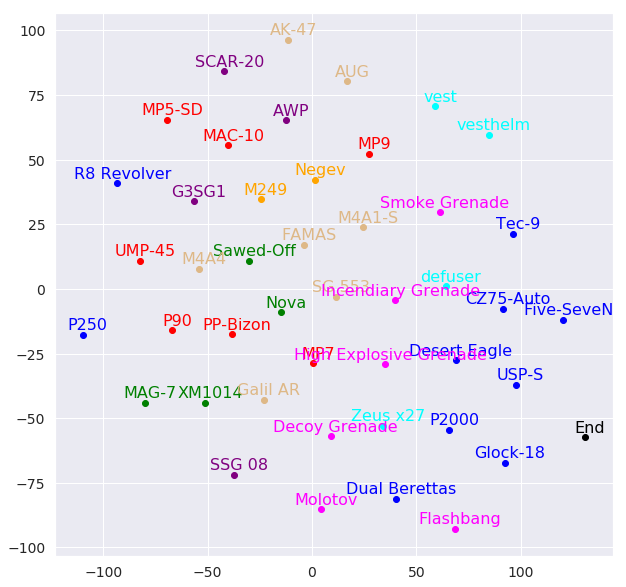

In [9]:
# Visualization
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

def tsne_plot(name, data):
    "Creates and TSNE model and plots it"
    data = data.astype(float)[:,1:-1]
    #for i in range(len(data)):
    #    print(data[i])
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(data)
    types = ['blue']*10+['green']*4+['red']*7+['burlywood']*7+['orange']*2+['purple']*4+['magenta']*6+['cyan']*4+['black']
    print(len(types))
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i],color = types[i])
        plt.annotate(name[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='center',
                     va='bottom',
                     size=16,
                     color = types[i])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig("t-SNE.pdf", bbox_inches='tight')
    plt.show()
    
embedding = np.load('../data/action_embedding2.npy')
name = np.load('../data/action_name.npy', allow_pickle=True)
print(name)
tsne_plot(name,embedding)